<a href="https://colab.research.google.com/github/TAUforPython/applied-statistics/blob/main/example%20applied%20statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All about appliead statistic

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.iolib.summary2 import summary_col, summary_params

## load dataset

https://github.com/artamonoff/econometrica/tree/main/econometrica-2

In [ ]:
# подключим датасет loanapp по ссылке
loanapp_df = pd.read_csv('https://raw.githubusercontent.com/TAUforPython/applied-statistics/refs/heads/main/loanapp.csv', na_values=(' ', '', '  '))

In [ ]:
# удалить все строки DataFrame, которые имеют значение NaN в столбцах mortno, unem, dep, male, married, yjob, self
loanapp_df = loanapp_df.dropna(subset=['mortno','unem','dep', 'male', 'married', 'yjob', 'self'])
#сбросим индекс DataFrame после удаления строк со значениями NaN
loanapp_df = loanapp_df.reset_index(drop=True)
loanapp_df

,occ,loanamt,action,msa,suffolk,appinc,typur,unit,married,dep,...,approve,mortno,mortperf,mortlat1,mortlat2,chist,multi,loanprc,thick,white
0,1,128,3,1120,0,74,0,1.0,1.0,1.0,...,0,0,1,0,0,1,0.0,0.800000,1.0,1
1,1,128,1,1120,0,84,3,1.0,0.0,0.0,...,1,0,1,0,0,1,0.0,0.895105,1.0,1
2,1,66,1,1120,0,36,0,1.0,1.0,0.0,...,1,0,1,0,0,0,0.0,0.600000,0.0,1
3,1,120,1,1120,0,59,8,1.0,1.0,0.0,...,1,0,1,0,0,1,0.0,0.895522,0.0,1
4,1,111,1,1120,0,63,9,1.0,0.0,0.0,...,1,0,1,0,0,0,0.0,0.804348,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,1,158,1,1120,0,96,0,1.0,1.0,0.0,...,1,0,1,0,0,1,0.0,0.897727,0.0,1
1967,1,35,1,1120,0,169,1,1.0,1.0,0.0,...,1,1,0,0,0,1,0.0,0.111111,0.0,1
1968,2,225,1,1120,0,49,0,2.0,1.0,0.0,...,1,0,1,0,0,1,1.0,1.000000,0.0,1
1969,1,98,1,1120,1,110,1,1.0,0.0,0.0,...,1,1,0,0,0,1,0.0,0.455814,0.0,1


In [ ]:
# посмотрим на первые пять строк датасета loanapp
loanapp_df.head(n=5)

,occ,loanamt,action,msa,suffolk,appinc,typur,unit,married,dep,...,approve,mortno,mortperf,mortlat1,mortlat2,chist,multi,loanprc,thick,white
0,1,128,3,1120,0,74,0,1.0,1.0,1.0,...,0,0,1,0,0,1,0.0,0.800000,1.0,1
1,1,128,1,1120,0,84,3,1.0,0.0,0.0,...,1,0,1,0,0,1,0.0,0.895105,1.0,1
2,1,66,1,1120,0,36,0,1.0,1.0,0.0,...,1,0,1,0,0,0,0.0,0.600000,0.0,1
3,1,120,1,1120,0,59,8,1.0,1.0,0.0,...,1,0,1,0,0,1,0.0,0.895522,0.0,1
4,1,111,1,1120,0,63,9,1.0,0.0,0.0,...,1,0,1,0,0,0,0.0,0.804348,0.0,1


## model fitting

In [ ]:
# 1 способ: зададим спецификацию модели через матрицы регрессионного дизайна
# Зададим матрицы регрессионного дизайна
y = loanapp_df['approve'] # зависимая переменная
X = add_constant(loanapp_df[['mortno','unem','dep', 'male', 'married', 'yjob', 'self']]) # регрессоры с добавленным столбом единиц

# зададим спецификацию модели используя матрицы регрессионного дизайна
mod_lpm = sm.OLS(endog=y, exog=X)
# подгонка модели с поправкой на гетероскедастичность
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# отчет
print(res_lpm_hc.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                approve   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
No. Observations:                1971   F-statistic:                     5.849
Covariance Type:                  HC3   Prob (F-statistic):           9.77e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8642      0.023     37.135      0.000       0.819       0.910
mortno         0.0733      0.015      4.886      0.000       0.044       0.103
unem          -0.0064      0.004     -1.605      0.108      -0.014       0.001
dep           -0.0185      0.008     -2.429      0.015      -0.033      -0.004
male           0.0019      0.021      0.089      0.929      -0.040       0.044
married        0.0459      0.019      2.458      0.0

In [ ]:
#2 способ: зададим спецификацию модели через формулу
#зададим спецификацию модели через формулу
mod_lpm = smf.ols(formula='approve~mortno+unem+dep+male+married+yjob+self', data=loanapp_df)
# подгонка модели с поправкой на гетероскедастичность
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# отчет
print(res_lpm_hc.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                approve   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
No. Observations:                1971   F-statistic:                     5.849
Covariance Type:                  HC3   Prob (F-statistic):           9.77e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8642      0.023     37.135      0.000       0.819       0.910
mortno         0.0733      0.015      4.886      0.000       0.044       0.103
unem          -0.0064      0.004     -1.605      0.108      -0.014       0.001
dep           -0.0185      0.008     -2.429      0.015      -0.033      -0.004
male           0.0019      0.021      0.089      0.929      -0.040       0.044
married        0.0459      0.019      2.458      0.0

In [ ]:
res_lpm_hc.params.round(3)

,0
Intercept,0.864
mortno,0.073
unem,-0.006
dep,-0.018
male,0.002
married,0.046
yjob,-0.001
self,-0.036


## Prediction

 Key point: Use OLS for continuous outcomes; use Logit or Probit for binary outcomes.

 Both Logit and Probit "squeeze" the linear predictor into [0,1] using an S-shaped curve—but Logit uses logistic CDF, Probit uses normal CDF.


---

### 1. **Outcome Variable (Dependent Variable)**
| Method | Type of Outcome |
|--------|------------------|
| **OLS** | Continuous (e.g., income, test score, temperature) |
| **Logit** | Binary (0/1) — e.g., yes/no, success/failure |
| **Probit** | Binary (0/1) — same as Logit |

> ✅ **Key point**: Use OLS for continuous outcomes; use Logit or Probit for binary outcomes.

---

### 2. **Model Form & Link Function**

- **OLS**:  
  \y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k + \varepsilon


  → Linear relationship. Predicts \(y\) directly.

- **Logit**:  
  Models the **log-odds** of \(P(y=1)\):  
  \[
  \log\left(\frac{P(y=1)}{1 - P(y=1)}\right) = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k
  \]  
  → Uses the **logistic function** to map linear predictor to probability:  
  \[
  P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots)}}
  \]

- **Probit**:  
  Assumes the underlying latent variable is **normally distributed**:  
  \[
  P(y=1) = \Phi(\beta_0 + \beta_1 x_1 + \dots + \beta_k x_k)
  \]  
  where \(\Phi(\cdot)\) is the **standard normal CDF**.

> 🔁 Both Logit and Probit "squeeze" the linear predictor into [0,1] using an S-shaped curve—but **Logit uses logistic CDF, Probit uses normal CDF**.

---

### 3. **Interpretation of Coefficients**

- **OLS**:  
  \(\beta_j\) = change in \(y\) for a 1-unit increase in \(x_j\).

- **Logit/Probit**:  
  \(\beta_j\) **is not directly interpretable** as a change in probability.  
  → You need **marginal effects** (as discussed earlier) to interpret real-world impact.

---

### 4. **Assumptions**

| Method | Key Assumptions |
|--------|------------------|
| **OLS** | Linearity, homoscedasticity, no multicollinearity, errors ~ Normal(0, σ²) |
| **Logit** | Errors follow **logistic distribution**; correct specification of log-odds |
| **Probit** | Errors follow **standard normal distribution** |

> ⚠️ **Never use OLS for binary outcomes** (this is called the *Linear Probability Model*). It can predict probabilities < 0 or > 1 and violates OLS assumptions (e.g., heteroscedasticity).


### OLS

In [ ]:
predict_df = pd.DataFrame( {'mortno': [0, 1, 0],
                      'unem': [4.3, 3.6, 3.5],
                     'dep': [1.0, 0.0, 1.0],
                     'male': [1.0, 0.0, 1.0],
                     'married': [1, 0, 1],
                     'yjob': [0, 0, 1],
                     'self': [1,1,1]} )
predict_df

,mortno,unem,dep,male,married,yjob,self
0,0,4.3,1.0,1.0,1,0,1
1,1,3.6,0.0,0.0,0,0,1
2,0,3.5,1.0,1.0,1,1,1


In [ ]:
res_lpm_hc.predict(exog=predict_df, transform=True).round(3)

,0
0,0.830
1,0.878
2,0.834


These values represent the predicted probabilities of loan approval for each of the three hypothetical applicants defined in predict_df.

For the first applicant (mortno=0, unem=4.3, dep=1.0, male=1.0, married=1, yjob=0, self=1), the predicted probability of loan approval is 83.0%.
For the second applicant (mortno=1, unem=3.6, dep=0.0, male=0.0, married=0, yjob=0, self=1), the predicted probability of loan approval is 87.8%.
For the third applicant (mortno=0, unem=3.5, dep=1.0, male=1.0, married=1, yjob=1, self=1), the predicted probability of loan approval is 83.4%.

### Logit

In [ ]:
mod = smf.logit(formula='approve~appinc+mortno+unem+dep+male+married+yjob+self', data=loanapp_df) # спецификация модели
res = mod.fit() # подгонка модели

res.summary() # отчет

Optimization terminated successfully.
         Current function value: 0.363490
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                approve   No. Observations:                 1971
Model:                          Logit   Df Residuals:                     1962
Method:                           MLE   Df Model:                            8
Date:                Mon, 19 Jan 2026   Pseudo R-squ.:                 0.02919
Time:                        19:06:07   Log-Likelihood:                -716.44
converged:                       True   LL-Null:                       -737.98
Covariance Type:            nonrobust   LLR p-value:                 8.485e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9315      0.199      9.689      0.000       1.541       2.322
appinc        -0.0010      0.001     -1.472      0.141      -0.002       0.000
mortno         0.7868      0.172      4.571      0.000       0.449       1.124
unem          -0.0549      0.029     -1.866      0.062      -0.113       0.003
dep           -0.1608      0.065     -2.486      0.013      -0.288      -0.034
male           0.0300      0.186      0.161      0.872      -0.334       0.394
married        0.4246      0.162      2.615      0.009       0.106       0.743
yjob          -0.0065      0.065     -0.099      0.921      -0.134       0.121
self          -0.2804      0.197     -1.426      0.154      -0.666       0.105
==============================================================================
"""

In [ ]:
mod = smf.probit(formula='approve~appinc+mortno+unem+dep+male+married+yjob+self', data=loanapp_df) # спецификация модели
res = mod.fit() # подгонка модели

Optimization terminated successfully.
         Current function value: 0.363578
         Iterations 6


In [ ]:
res.summary() # отчет

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                approve   No. Observations:                 1971
Model:                         Probit   Df Residuals:                     1962
Method:                           MLE   Df Model:                            8
Date:                Mon, 19 Jan 2026   Pseudo R-squ.:                 0.02895
Time:                        19:07:18   Log-Likelihood:                -716.61
converged:                       True   LL-Null:                       -737.98
Covariance Type:            nonrobust   LLR p-value:                 9.865e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1418      0.109     10.512      0.000       0.929       1.355
appinc        -0.0005      0.000     -1.375      0.169      -0.001       0.000
mortno         0.4071      0.087      4.703      0.000       0.237       0.577
unem          -0.0308      0.016     -1.909      0.056      -0.062       0.001
dep           -0.0828      0.035     -2.355      0.019      -0.152      -0.014
male           0.0200      0.099      0.201      0.841      -0.175       0.215
married        0.2208      0.086      2.552      0.011       0.051       0.390
yjob          -0.0007      0.035     -0.020      0.984      -0.069       0.068
self          -0.1583      0.107     -1.483      0.138      -0.367       0.051
==============================================================================
"""

In [ ]:
# коэффициенты подогнанной модели с округлением
res.params.round(3)

,0
Intercept,1.142
appinc,-0.001
mortno,0.407
unem,-0.031
dep,-0.083
male,0.020
married,0.221
yjob,-0.001
self,-0.158


In [ ]:
mod_lpm_extended = smf.ols(formula='approve~appinc+mortno+unem+dep+male+married+yjob+self', data=loanapp_df)
res_lpm_hc_extended = mod_lpm_extended.fit(cov_type='HC3')
print(res_lpm_hc_extended.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                approve   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
No. Observations:                1971   F-statistic:                     5.246
Covariance Type:                  HC3   Prob (F-statistic):           1.62e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8735      0.024     35.681      0.000       0.825       0.921
appinc        -0.0001      0.000     -1.179      0.239      -0.000     8.9e-05
mortno         0.0756      0.015      4.978      0.000       0.046       0.105
unem          -0.0068      0.004     -1.694      0.090      -0.015       0.001
dep           -0.0178      0.008     -2.347      0.019      -0.033      -0.003
male           0.0032      0.021      0.151      0.8

**Reasoning**:
The next step is to prepare an extended DataFrame (`predict_df_extended`) for prediction that includes the 'appinc' variable, as specified in the main task. I will create this DataFrame by combining the existing `predict_df` with the new 'appinc' values.



In [ ]:
predict_df_extended = predict_df.copy()
predict_df_extended['appinc'] = [74, 84, 36]
predict_df_extended

,mortno,unem,dep,male,married,yjob,self,appinc
0,0,4.3,1.0,1.0,1,0,1,74
1,1,3.6,0.0,0.0,0,0,1,84
2,0,3.5,1.0,1.0,1,1,1,36


**Reasoning**:
I need to explicitly refit the Logit model to a dedicated variable (e.g., `res_logit`) to avoid overwriting issues, as the `res` variable was reused for the Probit model later in the notebook. This ensures I have both Logit and Probit fitted models available for prediction.



In [ ]:
mod_logit = smf.logit(formula='approve~appinc+mortno+unem+dep+male+married+yjob+self', data=loanapp_df)
res_logit = mod_logit.fit()
print(res_logit.summary())

Optimization terminated successfully.
         Current function value: 0.363490
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                approve   No. Observations:                 1971
Model:                          Logit   Df Residuals:                     1962
Method:                           MLE   Df Model:                            8
Date:                Mon, 19 Jan 2026   Pseudo R-squ.:                 0.02919
Time:                        19:12:31   Log-Likelihood:                -716.44
converged:                       True   LL-Null:                       -737.98
Covariance Type:            nonrobust   LLR p-value:                 8.485e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9315      0.199      9.689      0.000       1.541       2.322
appinc        -0.0010      0.

In [ ]:
mod_probit = smf.probit(formula='approve~appinc+mortno+unem+dep+male+married+yjob+self', data=loanapp_df)
res_probit = mod_probit.fit()
print(res_probit.summary())

Optimization terminated successfully.
         Current function value: 0.363578
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                approve   No. Observations:                 1971
Model:                         Probit   Df Residuals:                     1962
Method:                           MLE   Df Model:                            8
Date:                Mon, 19 Jan 2026   Pseudo R-squ.:                 0.02895
Time:                        19:12:43   Log-Likelihood:                -716.61
converged:                       True   LL-Null:                       -737.98
Covariance Type:            nonrobust   LLR p-value:                 9.865e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1418      0.109     10.512      0.000       0.929       1.355
appinc        -0.0005      0.

In [ ]:
pred_ols = res_lpm_hc_extended.predict(exog=predict_df_extended).round(3)
pred_logit = res_logit.predict(exog=predict_df_extended).round(3)
pred_probit = res_probit.predict(exog=predict_df_extended).round(3)

print("OLS Predictions:\n", pred_ols)
print("\nLogit Predictions:\n", pred_logit)
print("\nProbit Predictions:\n", pred_probit)

OLS Predictions:
 0    0.835
1    0.882
2    0.845
dtype: float64

Logit Predictions:
 0    0.837
1    0.896
2    0.847
dtype: float64

Probit Predictions:
 0    0.834
1    0.892
2    0.845
dtype: float64


In [ ]:
predictions_df = predict_df_extended.copy()
predictions_df['OLS_Predictions'] = pred_ols
predictions_df['Logit_Predictions'] = pred_logit
predictions_df['Probit_Predictions'] = pred_probit

print(predictions_df)

   mortno  unem  dep  male  married  yjob  self  appinc  OLS_Predictions  \
0       0   4.3  1.0   1.0        1     0     1      74            0.835   
1       1   3.6  0.0   0.0        0     0     1      84            0.882   
2       0   3.5  1.0   1.0        1     1     1      36            0.845   

   Logit_Predictions  Probit_Predictions  
0              0.837               0.834  
1              0.896               0.892  
2              0.847               0.845  


### Explanation of Theoretical and Observed Differences

**Theoretical Differences:**

1.  **OLS (Linear Probability Model - LPM):**
    *   **Nature:** Treats the binary outcome variable (`approve`) as a continuous variable. It directly models the probability of approval as a linear function of the predictors.
    *   **Limitations:** Can produce predicted probabilities outside the [0, 1] range, which is theoretically impossible for probabilities. It also assumes homoscedastic errors, which is often violated in binary choice models, hence the use of robust standard errors (HC3) here.

2.  **Logit Model:**
    *   **Nature:** Uses the logistic function to transform the linear combination of predictors into a probability. The logistic function constrains predicted probabilities to be between 0 and 1.
    *   **Interpretation:** The coefficients represent the change in the log-odds of the outcome for a one-unit change in the predictor variable. The effect is non-linear and depends on the current probability.

3.  **Probit Model:**
    *   **Nature:** Similar to Logit, but uses the cumulative standard normal distribution function (probit function) to transform the linear combination of predictors into a probability. It also constrains predicted probabilities to be between 0 and 1.
    *   **Interpretation:** Coefficients represent the change in the Z-score (or normal equivalent deviate) of the outcome for a one-unit change in the predictor. The effect is also non-linear.

**Observed Differences:**

Looking at the `predictions_df`:

| Applicant | OLS_Predictions | Logit_Predictions | Probit_Predictions |
| :-------- | :-------------- | :---------------- | :----------------- |
| 1         | 0.835           | 0.837             | 0.834              |
| 2         | 0.882           | 0.896             | 0.892              |
| 3         | 0.845           | 0.847             | 0.845              |

*   **Overall Proximity:** For these specific hypothetical applicants and their predictor values, the predicted probabilities from all three models are quite close to each other. This often happens when predicted probabilities are not very close to 0 or 1 and the underlying distribution of the independent variables doesn't cause extreme non-linearities.
*   **Marginal Differences:** While close, there are slight differences:
    *   Logit predictions tend to be slightly higher than Probit predictions, especially for probabilities closer to the middle range (0.5), although here they are also very similar.
    *   OLS predictions are generally in line with Logit and Probit, suggesting that for these specific input values, the linear approximation holds reasonably well. However, OLS might produce predictions >1 or <0 for other input values, which the Logit and Probit models inherently avoid.

In this particular comparison, the three models provide very similar predicted probabilities, highlighting that when probabilities are in the middle range, the choice between Logit and Probit often doesn't lead to vastly different predictions, and even LPM can approximate them well. However, the theoretical robustness of Logit and Probit in handling probabilities within the [0,1] range makes them generally preferred for binary outcome modeling.

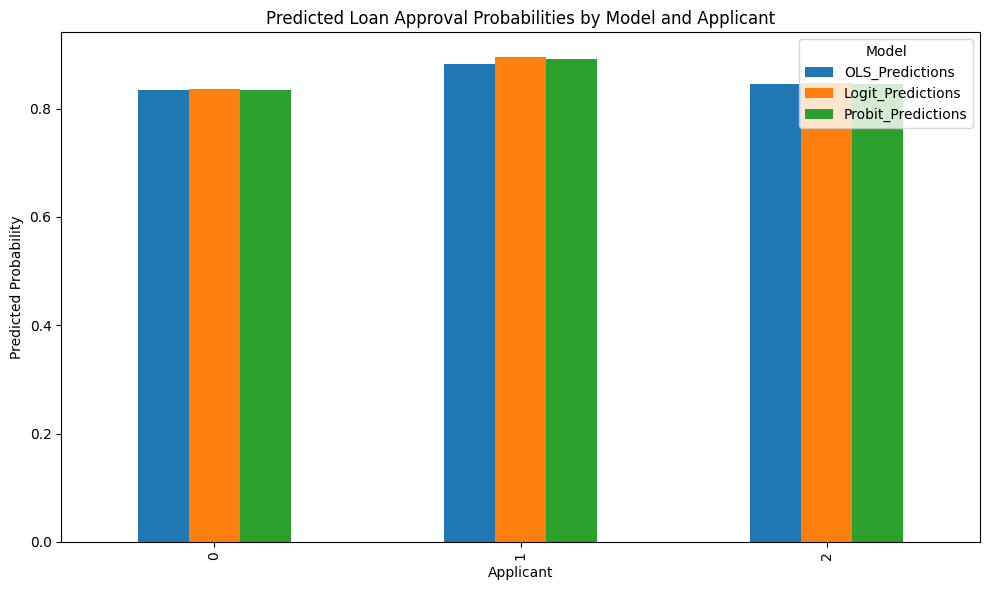

In [ ]:
import matplotlib.pyplot as plt

# Select the prediction columns
prediction_columns = ['OLS_Predictions', 'Logit_Predictions', 'Probit_Predictions']

# Create a bar chart from these selected columns
predictions_df[prediction_columns].plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title('Predicted Loan Approval Probabilities by Model and Applicant')
plt.ylabel('Predicted Probability')
plt.xlabel('Applicant')

# Add a legend
plt.legend(title='Model')

# Ensure tight layout and display the plot
plt.tight_layout()
plt.show()

### Model comparison

In [ ]:
#Спецификация и подгонка нескольких моделей
# model 1
mod_1 = smf.probit(formula = 'approve~appinc+mortno+unem+dep+male+married+yjob+self', data = loanapp_df)
res_1 = mod_1.fit(disp=False)

# model 2
mod_2 = smf.probit(formula = 'approve~appinc+dep+male+married+yjob+self', data = loanapp_df)
res_2 = mod_2.fit(disp=False)

# model 3
mod_3 = smf.probit(formula = 'approve~+mortno+unem+dep+male+married+yjob+self', data = loanapp_df)
res_3 = mod_3.fit(disp=False)

# model 4
mod_4 = smf.probit(formula = 'approve~appinc+mortno+self', data = loanapp_df)
res_4 = mod_4.fit(disp=False)

# Сравнение моделей
# Имена моделей
mod_names = ['Модель 1', 'Модель 2', 'Модель 3', 'Модель 4']
# порядок регрессоров в таблице
reg_order = ['Intercept', 'appinc', 'mortno', 'unem', 'dep',
             'male', 'married', 'yjob','self']
# Зависимая переменная LFP
summary_col([res_1, res_2, res_3, res_4], model_names=mod_names, stars=True, regressor_order=reg_order, float_format='%.3f')

,Модель 1,Модель 2,Модель 3,Модель 4
Intercept,1.142***,1.088***,1.105***,1.106***
,(0.109),(0.092),(0.105),(0.053)
appinc,-0.001,-0.000,,-0.000
,(0.000),(0.000),,(0.000)
mortno,0.407***,,0.398***,0.423***
,(0.087),,(0.086),(0.085)
unem,-0.031*,,-0.029*,
,(0.016),,(0.016),
dep,-0.083**,-0.072**,-0.086**,
,(0.035),(0.035),(0.035),


In [ ]:
info_to_add = {'AIC': lambda x: '%.3f' % x.aic, 'BIC': lambda x: '%.3f' % x.bic, 'R2_adj': lambda x: '%.3f' % (1-(x.llf-x.df_model-1)/x.llnull) }
# параметр '%.3f' % отвечает за округление до 3-х знаков после запятой числа указанного после знака процента

# Зависимая переменная LFP
summary_col(results=[res_1, res_2, res_3, res_4], model_names=mod_names, stars=True, float_format='%.3f', regressor_order=reg_order, info_dict=info_to_add)

,Модель 1,Модель 2,Модель 3,Модель 4
Intercept,1.142***,1.088***,1.105***,1.106***
,(0.109),(0.092),(0.105),(0.053)
appinc,-0.001,-0.000,,-0.000
,(0.000),(0.000),,(0.000)
mortno,0.407***,,0.398***,0.423***
,(0.087),,(0.086),(0.085)
unem,-0.031*,,-0.029*,
,(0.016),,(0.016),
dep,-0.083**,-0.072**,-0.086**,
,(0.035),(0.035),(0.035),


Based on the model comparison, Model 3 appears to be the best model. Here's why:

AIC (Akaike Information Criterion): Model 3 has the lowest AIC value (1451.070), indicating a better balance between fit and complexity compared to the other models.




> AIC = 2*k - 2*ln(L)
>
>k =	число оцениваемых параметров в модели
>
>L =	максимизированное значение функции правдоподобия модели


BIC (Bayesian Information Criterion): Model 3 also has the lowest BIC value (1495.760), which provides a stronger penalty for additional parameters and again suggests it is the preferred model.

> BIC = k*ln(n) - 2*ln(L)
>
> n = число наблюдений

Adjusted R-squared (R2_adj): Model 3 has an Adjusted R-squared of 0.017, which is tied for the highest among all models, indicating a good explanatory power while accounting for the number of predictors.
While the R2_adj for Model 1 is the same as Model 3, the lower AIC and BIC values for Model 3 make it the strongest candidate for the 'best' model among the options presented.

## Marginal effects

A marginal effect measures how the predicted outcome of a model changes when you change one of the input variables (also called a regressor or feature) by a small amount—holding all other variables constant.
A marginal effect tells you the change in predicted probability (or outcome) associated with a small (or discrete) change in a predictor, keeping everything else fixed. In nonlinear models like logit, it varies across observations—which is why we often report average marginal effects (AME).